## Observations and Insights 

In [150]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from sklearn import datasets
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single datase
combo_metadata_results = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="outer")
combo_metadata_results.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [151]:
# Checking the number of mice in the DataFrame.
orig_number_of_mice = len(combo_metadata_results["Mouse ID"].unique())
orig_number_of_mice

249

In [193]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice_id_tpoint = combo_metadata_results.loc[combo_metadata_results.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mice_id_tpoint

array(['g989'], dtype=object)

In [153]:
# Optional: Get all the data for the duplicate mouse ID. 


In [154]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_combo_metadata_df = combo_metadata_results[combo_metadata_results['Mouse ID'] != 'g989']
new_combo_metadata_df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 1880 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1880 non-null   object 
 1   Timepoint           1880 non-null   int64  
 2   Tumor Volume (mm3)  1880 non-null   float64
 3   Metastatic Sites    1880 non-null   int64  
 4   Drug Regimen        1880 non-null   object 
 5   Sex                 1880 non-null   object 
 6   Age_months          1880 non-null   int64  
 7   Weight (g)          1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 132.2+ KB


In [155]:
# Checking the number of mice in the clean DataFrame.
new_number_mice = len(new_combo_metadata_df["Mouse ID"].unique())
new_number_mice

248

## Summary Statistics

In [156]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

In [157]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
group_by_regimen = new_combo_metadata_df.groupby("Drug Regimen")
group_by_regimen

mean_tumor_vol = group_by_regimen["Tumor Volume (mm3)"].mean()

median_tumor_vol = group_by_regimen["Tumor Volume (mm3)"].median()

var_tumor_vol = group_by_regimen["Tumor Volume (mm3)"].var()

std_tumor_vol = group_by_regimen["Tumor Volume (mm3)"].std()

sem_tumor_vol = group_by_regimen["Tumor Volume (mm3)"].sem()

tumor_vol_summary_stats = pd.DataFrame({"Mean Tumor Volume":     mean_tumor_vol,
                                        "Median Tumor Volume":   median_tumor_vol,
                                        "Tumor Volume Variance": var_tumor_vol,
                                        "Tumor Volume Std Dev":  std_tumor_vol,
                                        "Tumor Volume Std Err":  sem_tumor_vol})
tumor_vol_summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume Std Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

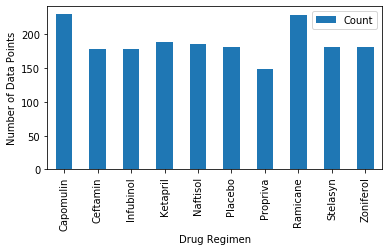

In [158]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

mice_per_timepoint_pd = pd.DataFrame(new_combo_metadata_df.groupby(["Drug Regimen"]).count()).reset_index()

#select the two axis
number_of_datapoints = mice_per_timepoint_pd[["Drug Regimen","Mouse ID"]]
number_of_datapoints = number_of_datapoints.rename(columns={"Mouse ID": "Count"})

number_of_datapoints = number_of_datapoints.set_index("Drug Regimen")
#mice_per_timepoint_pd.plot.bar(x = "Drug Regimen", y = "Timepoint", rot = 0)
number_of_datapoints.plot(kind="bar", figsize=(6,3))
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.show()

#note: the two graphs below are the same but the data is organized differently in both.



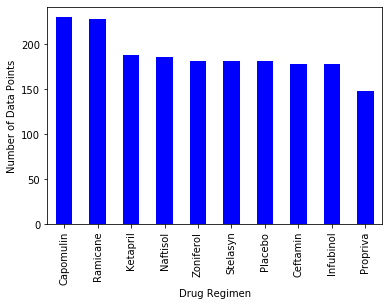

In [159]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

mice_per_timepoint_py = new_combo_metadata_df["Drug Regimen"].value_counts()
mice_per_timepoint_py.plot(kind="bar", color="blue")

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

plt.show()


## Pie Plots

([<matplotlib.patches.Wedge at 0x1202207c0>,
 [Text(0.013934097579311265, 1.0999117423341975, 'Males'),
  Text(-0.0139340975793114, -1.0999117423341975, 'Females')],
 [Text(0.007600416861442507, 0.5999518594550168, '49.6%'),
  Text(-0.007600416861442581, -0.5999518594550168, '50.4%')])

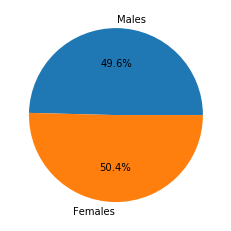

In [192]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
id_gender = new_combo_metadata_df[['Mouse ID', 'Sex']]
id_gender = id_gender.drop_duplicates('Mouse ID')
mice_per_timepoint = id_gender.groupby("Sex")
count_df = mice_per_timepoint["Sex"].count()
count_df
sizes = count_df
labels = ["Males", "Females"]
plt.pie(sizes, autopct="%0.1f%%", labels=labels)



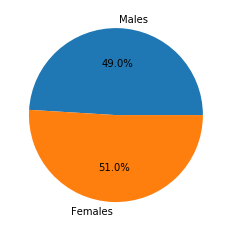

In [189]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

female_male_ctr = (new_combo_metadata_df.groupby(["Sex"])["Mouse ID"].count()).tolist()
new_combo_metadata_df
female_male_ctr

#colors = ["Orange", "blue"]
labels = ["Males", "Females"]

plt.pie(female_male_ctr, labels=labels, autopct="%0.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [162]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 


In [163]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

In [164]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
lineplot_capomulin = new_combo_metadata_df.loc[new_combo_metadata_df["Drug Regimen"] == "Capomulin"]
lineplot_capomulin = capomulin_df.reset_index()
lineplot_capomulin.head()
#now choose a mouse to see its corresponding data


,level_0,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,0,0,b128,0,45.000000,0,Capomulin,Female,9,22
1,1,1,b128,5,45.651331,0,Capomulin,Female,9,22
2,2,2,b128,10,43.270852,0,Capomulin,Female,9,22
3,3,3,b128,15,43.784893,0,Capomulin,Female,9,22
4,4,4,b128,20,42.731552,0,Capomulin,Female,9,22


In [165]:
#now choose a mouse to see its corresponding data. for example the one above (b128)
mouse_b128 = lineplot_capomulin.loc[lineplot_capomulin["Mouse ID"] == "b128"]
mouse_b128


,level_0,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,0,0,b128,0,45.000000,0,Capomulin,Female,9,22
1,1,1,b128,5,45.651331,0,Capomulin,Female,9,22
2,2,2,b128,10,43.270852,0,Capomulin,Female,9,22
3,3,3,b128,15,43.784893,0,Capomulin,Female,9,22
4,4,4,b128,20,42.731552,0,Capomulin,Female,9,22
5,5,5,b128,25,43.262145,1,Capomulin,Female,9,22
6,6,6,b128,30,40.605335,1,Capomulin,Female,9,22
7,7,7,b128,35,37.967644,1,Capomulin,Female,9,22
8,8,8,b128,40,38.379726,2,Capomulin,Female,9,22
9,9,9,b128,45,38.982878,2,Capomulin,Female,9,22


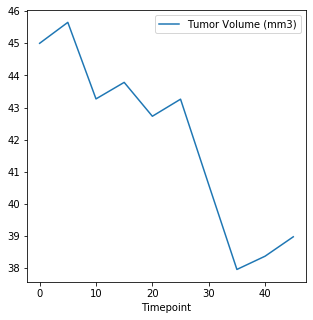

In [166]:
mouse_b128 = mouse_b128.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]

mouse_b128 = mouse_b128.reset_index(drop=True)

mouse_b128.set_index("Timepoint").plot(figsize=(5,5))


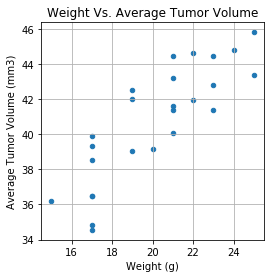

In [167]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
weight_vol_capomulin = lineplot_capomulin.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
#weight_vol_capomulin.head()

tumor_vol_avg = pd.DataFrame(weight_vol_capomulin.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
tumor_vol_avg.head()

tumor_vol_avg = tumor_vol_avg.set_index('Mouse ID')

tumor_vol_avg = tumor_vol_avg.rename(columns={"Tumor Volume (mm3)": "Average Tumor Volume (mm3)"})

#plot data
tumor_vol_avg.plot(kind="scatter", x="Weight (g)", y="Average Tumor Volume (mm3)", grid=True, figsize=(4,4),
              title="Weight Vs. Average Tumor Volume")
plt.show()

## Correlation and Regression

In [168]:
# Calculate the correlation coefficient
# for mouse weight and average tumor volume for the Capomulin regimen

average_tumor_vol = tumor_vol_avg.iloc[:,1]
mouse_weight = tumor_vol_avg.iloc[:,0]

corr_coef = st.pearsonr(mouse_weight,average_tumor_vol)
print(f"The correlation between mouse weight and the average tumor volume is {round(corr_coef[0],2)}")






The correlation between mouse weight and the average tumor volume is 0.84


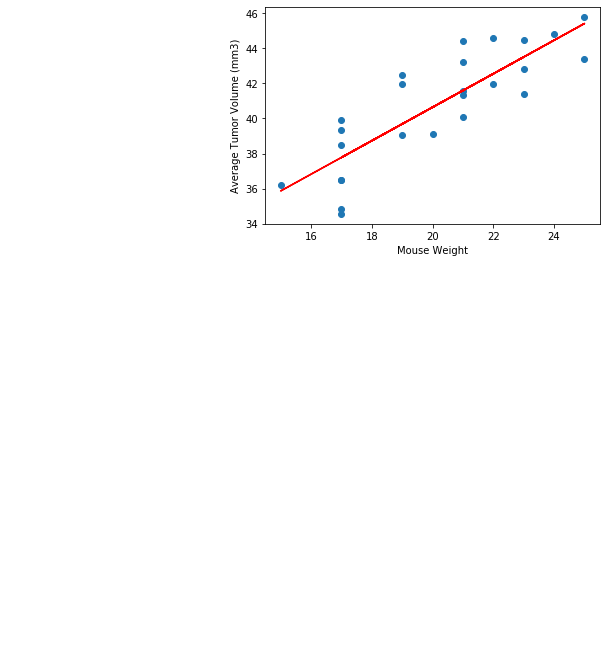

In [169]:
#now calculate the linear regression model

x_values = tumor_vol_avg['Weight (g)']
y_values = tumor_vol_avg['Average Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()